In [1]:
# Importação dos Pacotes
import xarray as xr
import numpy as np

#### Creating an Xarray example

In [2]:
values = np.random.random(size=(4,3))
values


array([[0.04589342, 0.51806013, 0.66405875],
       [0.98120998, 0.27367516, 0.31059109],
       [0.54055556, 0.48454563, 0.04443118],
       [0.40831608, 0.85189854, 0.44974895]])

In [3]:
# Dims Y represents rows and X represent columns.
dimensions = ("y", "x")

In [4]:
# Cordinates labels/values
cordinates = {
    "x":[10,11,12],
    "y":[10,20,30,40]
}

In [5]:
data = xr.DataArray(values, dims=dimensions, coords=cordinates )
data

<xarray.DataArray (y: 4, x: 3)>
array([[0.04589342, 0.51806013, 0.66405875],
       [0.98120998, 0.27367516, 0.31059109],
       [0.54055556, 0.48454563, 0.04443118],
       [0.40831608, 0.85189854, 0.44974895]])
Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 10 20 30 40

### Coordinates and Attributes

#### Proprities of Xarray

In [6]:
data.dims

('y', 'x')

In [7]:
data.size

12

In [8]:
data.dtype

dtype('float64')

In [9]:
data.coords

Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 10 20 30 40

#### Acess specific coordinate

In [10]:
data.coords["x"]

<xarray.DataArray 'x' (x: 3)>
array([10, 11, 12])
Coordinates:
  * x        (x) int32 10 11 12

In [11]:
data.coords["y"]

<xarray.DataArray 'y' (y: 4)>
array([10, 20, 30, 40])
Coordinates:
  * y        (y) int32 10 20 30 40

#### Acess values on the coordinates

In [12]:
data.coords["x"][1]

<xarray.DataArray 'x' ()>
array(11)
Coordinates:
    x        int32 11

In [13]:
for i in range(0, len(data.coords["x"])):
    print(data.coords["x"][i])

<xarray.DataArray 'x' ()>
array(10)
Coordinates:
    x        int32 10
<xarray.DataArray 'x' ()>
array(11)
Coordinates:
    x        int32 11
<xarray.DataArray 'x' ()>
array(12)
Coordinates:
    x        int32 12


In [14]:
for i in range(0, len(data.coords["y"])):
    print(data.coords["y"][i])

<xarray.DataArray 'y' ()>
array(10)
Coordinates:
    y        int32 10
<xarray.DataArray 'y' ()>
array(20)
Coordinates:
    y        int32 20
<xarray.DataArray 'y' ()>
array(30)
Coordinates:
    y        int32 30
<xarray.DataArray 'y' ()>
array(40)
Coordinates:
    y        int32 40


#### Using pandas-like notation

In [15]:
data.x[1]

<xarray.DataArray 'x' ()>
array(11)
Coordinates:
    x        int32 11

In [16]:
data.y[1]

<xarray.DataArray 'y' ()>
array(20)
Coordinates:
    y        int32 20

In [17]:
data.x.values

array([10, 11, 12])

#### Attributes

In [18]:
data.attrs = {"author": "AR", "date": "2020-09-30"}
data.attrs["name"] = "density"
data.attrs["units"] = "g/cm^3"
data.x.attrs["units"] = "cm"
data.y.attrs["units"] = "cm"

In [19]:
data.attrs

{'author': 'AR', 'date': '2020-09-30', 'name': 'density', 'units': 'g/cm^3'}

In [20]:
data

<xarray.DataArray (y: 4, x: 3)>
array([[0.04589342, 0.51806013, 0.66405875],
       [0.98120998, 0.27367516, 0.31059109],
       [0.54055556, 0.48454563, 0.04443118],
       [0.40831608, 0.85189854, 0.44974895]])
Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 10 20 30 40
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [21]:
data.x

<xarray.DataArray 'x' (x: 3)>
array([10, 11, 12])
Coordinates:
  * x        (x) int32 10 11 12
Attributes:
    units:    cm

In [22]:
data.y

<xarray.DataArray 'y' (y: 4)>
array([10, 20, 30, 40])
Coordinates:
  * y        (y) int32 10 20 30 40
Attributes:
    units:    cm

In [23]:
data["y"]

<xarray.DataArray 'y' (y: 4)>
array([10, 20, 30, 40])
Coordinates:
  * y        (y) int32 10 20 30 40
Attributes:
    units:    cm

In [24]:
data.coords["y"]

<xarray.DataArray 'y' (y: 4)>
array([10, 20, 30, 40])
Coordinates:
  * y        (y) int32 10 20 30 40
Attributes:
    units:    cm

### Subsetting arrays

#### Using the Python square brackets

In [25]:
# First row, also a DataArray
data[0,:]

<xarray.DataArray (x: 3)>
array([0.04589342, 0.51806013, 0.66405875])
Coordinates:
  * x        (x) int32 10 11 12
    y        int32 10
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [26]:
# last two columns
data[:, -2:]

<xarray.DataArray (y: 4, x: 2)>
array([[0.51806013, 0.66405875],
       [0.27367516, 0.31059109],
       [0.48454563, 0.04443118],
       [0.85189854, 0.44974895]])
Coordinates:
  * x        (x) int32 11 12
  * y        (y) int32 10 20 30 40
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [27]:
# Can modify in-place
data[-1,-1] = 0.999999
data

<xarray.DataArray (y: 4, x: 3)>
array([[0.04589342, 0.51806013, 0.66405875],
       [0.98120998, 0.27367516, 0.31059109],
       [0.54055556, 0.48454563, 0.04443118],
       [0.40831608, 0.85189854, 0.999999  ]])
Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 10 20 30 40
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [28]:
# first row, numpy array 
data.values[0,0:]

array([0.04589342, 0.51806013, 0.66405875])

##### DataArray.isel() selects by coordinate index (single index, list, range ) - Pandas Iloc

In [29]:
data.isel(y=1) # Second row

<xarray.DataArray (x: 3)>
array([0.98120998, 0.27367516, 0.31059109])
Coordinates:
  * x        (x) int32 10 11 12
    y        int32 20
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [30]:
type(data.isel(y=1))

xarray.core.dataarray.DataArray

In [31]:
data.isel(y=0, x=[-2, -1]) # first row, last two columns

<xarray.DataArray (x: 2)>
array([0.51806013, 0.66405875])
Coordinates:
  * x        (x) int32 11 12
    y        int32 10
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [32]:
data

<xarray.DataArray (y: 4, x: 3)>
array([[0.04589342, 0.51806013, 0.66405875],
       [0.98120998, 0.27367516, 0.31059109],
       [0.54055556, 0.48454563, 0.04443118],
       [0.40831608, 0.85189854, 0.999999  ]])
Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 10 20 30 40
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [33]:
data.isel(y=0, x=[-2, -1]).values

array([0.51806013, 0.66405875])

##### DataArray.sel() selects by coordinate value (single value, list, range ) Pandas loc

In [34]:
data.x.dtype

dtype('int32')

In [35]:
data.x.values

array([10, 11, 12])

In [36]:
data.sel(x=10)

<xarray.DataArray (y: 4)>
array([0.04589342, 0.98120998, 0.54055556, 0.40831608])
Coordinates:
    x        int32 10
  * y        (y) int32 10 20 30 40
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [37]:
data.y

<xarray.DataArray 'y' (y: 4)>
array([10, 20, 30, 40])
Coordinates:
  * y        (y) int32 10 20 30 40
Attributes:
    units:    cm

In [38]:
data.sel(x=10, y=[30,40])

<xarray.DataArray (y: 2)>
array([0.54055556, 0.40831608])
Coordinates:
    x        int32 10
  * y        (y) int32 30 40
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [39]:
data.sel(x=10, y=[30,40]).values

array([0.54055556, 0.40831608])

In [40]:
data.sel(y=slice(15,30)) # only 15<=y<=30

<xarray.DataArray (y: 2, x: 3)>
array([[0.98120998, 0.27367516, 0.31059109],
       [0.54055556, 0.48454563, 0.04443118]])
Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 20 30
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [41]:
data

<xarray.DataArray (y: 4, x: 3)>
array([[0.04589342, 0.51806013, 0.66405875],
       [0.98120998, 0.27367516, 0.31059109],
       [0.54055556, 0.48454563, 0.04443118],
       [0.40831608, 0.85189854, 0.999999  ]])
Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 10 20 30 40
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

##### DataArray.interp() interpolates by coordinate value

In [42]:
data.interp(x=10.5, y=15) # between 1st ans 2nd rows, between 1st ans 2nd columns

<xarray.DataArray ()>
array(0.45470967)
Coordinates:
    x        float64 10.5
    y        int32 15
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

In [43]:
# inter = soma(0.42612853, 0.82277354,0.01172736, 0.56487177) / N elementos 4

In [44]:
data.interp(x=10.5, y=15).values # between 1st ans 2nd rows, between 1st ans 2nd columns

array(0.45470967)

In [45]:
data.interp(x=10.5, y=15, method='nearest').values # closest neighbour

array(0.04589342)

In [46]:
data.interp(y=15) # between 1st ans 2nd rows

<xarray.DataArray (x: 3)>
array([0.5135517 , 0.39586764, 0.48732492])
Coordinates:
  * x        (x) int32 10 11 12
    y        int32 15
Attributes:
    author:   AR
    date:     2020-09-30
    name:     density
    units:    g/cm^3

##### Aggregate Functions

In [47]:
meanOfEachColumn = data.mean(dim='y') # apply mean over y
meanOfEachColumn

<xarray.DataArray (x: 3)>
array([0.49399376, 0.53204487, 0.50477   ])
Coordinates:
  * x        (x) int32 10 11 12

In [48]:
spatialMean = data.mean(dim=['x', 'y']) # apply mean over both x and y
spatialMean

<xarray.DataArray ()>
array(0.51026954)

In [49]:
spatialMean = data.mean() # same
spatialMean

<xarray.DataArray ()>
array(0.51026954)

##### DataArray.groupby()

In [50]:
columns = data.groupby('x')
columns

DataArrayGroupBy, grouped over 'x'
3 groups with labels 10, 11, 12.

###### You can apply a function separately to each group:

In [51]:
columns.map(lambda v: v.sum()/len(v)) # could use v.mean() too with the same result

<xarray.DataArray (x: 3)>
array([0.49399376, 0.53204487, 0.50477   ])
Coordinates:
  * x        (x) int32 10 11 12

In [52]:
columns.map(lambda v: (v-v.min())/(v.max() - v.min())) # normalize data in each column

<xarray.DataArray (y: 4, x: 3)>
array([[0.        , 0.42264802, 0.64843914],
       [1.        , 0.        , 0.27853586],
       [0.52887136, 0.36468687, 0.        ],
       [0.38748662, 1.        , 1.        ]])
Coordinates:
  * x        (x) int32 10 11 12
  * y        (y) int32 10 20 30 40

#### Plotting

##### Matplotlib is integrated directly into xarray:

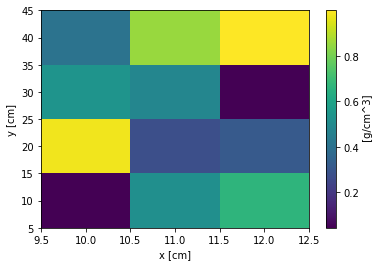

In [53]:
data.plot(size=4)

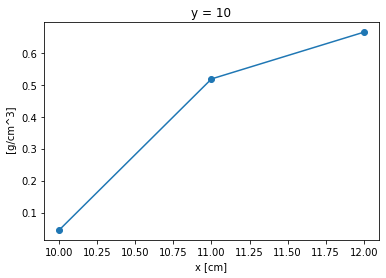

In [54]:
data.isel(y=0).plot(marker='o', size=4, markersize=6)

#### Create a 3D Array

##### Let´s create a function inside a unit cube x,y,z ∈ [0,1] on a 50^3 grid:

In [55]:
import numpy as np

n = 50
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n).reshape(n, 1)
z = np.linspace(0, 1, n).reshape(n, 1, 1)

In [56]:
f1 = np.sin(5*x)**8 + np.cos(5+25*x*y) * np.cos(5*x) # Function at one side of the cube (z=0)
f2 = np.sin(5*x)**8 + np.cos(5+25*x*y) * np.cos(5*y) # Rotated 90 degrees, other size (z=1)

In [57]:
f = (1-z)*f1 + x*f2

In [58]:
coords = {'z': z.flatten(), 'y': y.flatten(), 'x':x} # Supply 1D array to all
rho = xr.DataArray(
    f,
    dims=('z','y','x'),
    coords=coords
)

In [59]:
rho

<xarray.DataArray (z: 50, y: 50, x: 50)>
array([[[2.83662185e-01, 2.87975711e-01, 2.89356503e-01, ...,
         2.20095026e+00, 2.05369438e+00, 1.79402257e+00],
        [2.83662185e-01, 2.98065212e-01, 3.09597769e-01, ...,
         2.63271765e+00, 2.54466388e+00, 2.34505930e+00],
        [2.83662185e-01, 3.08056169e-01, 3.29559769e-01, ...,
         2.88088483e+00, 2.82156419e+00, 2.64945308e+00],
        ...,
        [2.83662185e-01, 6.98683475e-01, 9.37472545e-01, ...,
         1.74781594e+00, 1.46342673e+00, 1.15037413e+00],
        [2.83662185e-01, 7.07505264e-01, 9.47363361e-01, ...,
         1.65083561e+00, 1.44784745e+00, 1.26701832e+00],
        [2.83662185e-01, 7.16252621e-01, 9.56815772e-01, ...,
         1.63449356e+00, 1.56261976e+00, 1.51740676e+00]],

       [[2.77873161e-01, 2.82216799e-01, 2.83687557e-01, ...,
         2.18062144e+00, 2.03485839e+00, 1.77778967e+00],
        [2.77873161e-01, 2.92103908e-01, 3.03531003e-01, ...,
         2.61167799e+00, 2.52422810e+00, 2.32632456e+00],
        [2.77873161e-01, 3.01893119e-01, 3.23097813e-01, ...,
         2.85941459e+00, 2.80018129e+00, 2.62927200e+00],
...
        [5.78902419e-03, 1.54283082e-02, 2.23147201e-02, ...,
         8.73907970e-01, 7.87115141e-01, 6.61601788e-01],
        [5.78902419e-03, 1.70523424e-02, 2.64165741e-02, ...,
         7.78068374e-01, 7.31386859e-01, 6.63334152e-01],
        [5.78902419e-03, 1.86767995e-02, 3.04793914e-02, ...,
         7.44126323e-01, 7.72642577e-01, 7.74187122e-01]],

       [[0.00000000e+00, 5.78902443e-03, 1.15781646e-02, ...,
         1.20483808e+00, 1.13073101e+00, 9.98610261e-01],
        [0.00000000e+00, 5.96130424e-03, 1.23262161e-02, ...,
         1.60177461e+00, 1.54331076e+00, 1.42705671e+00],
        [0.00000000e+00, 6.06670853e-03, 1.29239125e-02, ...,
         1.82884325e+00, 1.77380184e+00, 1.66058028e+00],
        ...,
        [0.00000000e+00, 1.19382553e-03, 3.24893210e-03, ...,
         8.55701554e-01, 7.73025317e-01, 6.51419030e-01],
        [0.00000000e+00, 2.66790648e-03, 7.23018270e-03, ...,
         7.59885723e-01, 7.16460596e-01, 6.50757399e-01],
        [0.00000000e+00, 4.14396985e-03, 1.11807168e-02, ...,
         7.25577006e-01, 7.56184719e-01, 7.58703379e-01]]])
Coordinates:
  * z        (z) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
  * y        (y) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
  * x        (x) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0

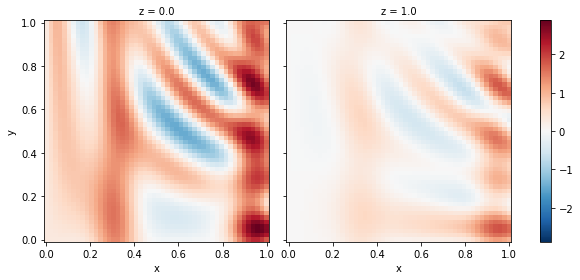

In [60]:
# rho.sel(z=[0,1])  is a 3D DataArray with two z values
# rho.sel(z=[0,1]).plot(size=8, col='z')  will produce a histogram
rho.sel(z=[0,1]).plot(size=4, col='z')

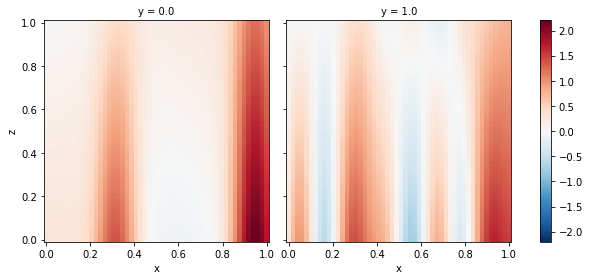

In [61]:
rho.sel(y=[0,1]).plot(size=4, col='y')

In [62]:
rho.to_netcdf("rho.nc") # Write to disk - See on program for download ans install https://www.paraview.org/

#### Dataset

##### Create a dataset from scratch, starting from the existing code for rho DataArray:

In [63]:
temp = xr.DataArray(
    20 + 2 * np.random.randn(n,n,n), # standard normal distribuition
    dims=('z', 'y', 'x'),
    coords=coords
)

In [64]:
temp

<xarray.DataArray (z: 50, y: 50, x: 50)>
array([[[18.31730401, 18.8577816 , 19.20491036, ..., 17.40896671,
         21.91180261, 17.18302521],
        [20.05325396, 20.59750095, 21.28999512, ..., 22.39726878,
         21.07044262, 21.69373655],
        [19.06292168, 17.05891132, 16.6469093 , ..., 20.68787012,
         18.51720712, 19.80581159],
        ...,
        [23.56744596, 18.27494247, 21.07919117, ..., 17.98359304,
         22.41418013, 18.95515303],
        [17.73027741, 20.98243711, 21.04712175, ..., 23.2943715 ,
         18.80922155, 22.41643925],
        [18.40692391, 23.47345207, 24.2175034 , ..., 21.37228612,
         21.35114915, 20.69876135]],

       [[15.55511832, 20.33928372, 20.71718252, ..., 21.36357611,
         21.12670062, 18.70232169],
        [17.30918857, 16.65756293, 19.55485816, ..., 17.99168465,
         19.89887919, 14.91832139],
        [19.61261807, 19.63443422, 21.4502562 , ..., 18.98575257,
         21.47111998, 18.33105392],
...
        [19.60772333, 19.89765544, 22.61715434, ..., 21.26952174,
         21.90669315, 19.86597786],
        [16.79519879, 23.09412444, 22.8625725 , ..., 18.95641219,
         20.7058273 , 16.0183143 ],
        [23.34328756, 18.51999378, 14.33383161, ..., 20.03941353,
         17.03371464, 20.63223895]],

       [[18.44146635, 18.17822037, 19.10424467, ..., 19.28371506,
         19.8211018 , 17.88245287],
        [18.31285392, 21.2518496 , 22.07978754, ..., 18.99252445,
         19.07949693, 20.11986044],
        [20.36745032, 23.1464493 , 17.64789603, ..., 21.31567562,
         19.33046841, 22.3917405 ],
        ...,
        [24.77793067, 20.9521638 , 17.9787292 , ..., 18.57848751,
         19.4708318 , 21.85173765],
        [16.43887486, 18.88222054, 19.22658767, ..., 20.83386293,
         21.18474443, 19.76537659],
        [21.86131165, 19.30736672, 20.12088863, ..., 19.31003948,
         19.1163371 , 22.10692091]]])
Coordinates:
  * z        (z) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
  * y        (y) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
  * x        (x) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0

In [65]:
ds = xr.Dataset(
    {"temperature": temp, "density": rho, "bar": ("x", 200+np.arange(n)), "pi": np.pi }
    )

In [66]:
ds

<xarray.Dataset>
Dimensions:      (z: 50, y: 50, x: 50)
Coordinates:
  * z            (z) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
  * y            (y) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
  * x            (x) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
Data variables:
    temperature  (z, y, x) float64 18.32 18.86 19.2 18.02 ... 19.31 19.12 22.11
    density      (z, y, x) float64 0.2837 0.288 0.2894 ... 0.7256 0.7562 0.7587
    bar          (x) int32 200 201 202 203 204 205 ... 244 245 246 247 248 249
    pi           float64 3.142

In [67]:
ds.density.shape

(50, 50, 50)

In [68]:
ds.pi

<xarray.DataArray 'pi' ()>
array(3.14159265)

In [69]:
ds.x

<xarray.DataArray 'x' (x: 50)>
array([0.      , 0.020408, 0.040816, 0.061224, 0.081633, 0.102041, 0.122449,
       0.142857, 0.163265, 0.183673, 0.204082, 0.22449 , 0.244898, 0.265306,
       0.285714, 0.306122, 0.326531, 0.346939, 0.367347, 0.387755, 0.408163,
       0.428571, 0.44898 , 0.469388, 0.489796, 0.510204, 0.530612, 0.55102 ,
       0.571429, 0.591837, 0.612245, 0.632653, 0.653061, 0.673469, 0.693878,
       0.714286, 0.734694, 0.755102, 0.77551 , 0.795918, 0.816327, 0.836735,
       0.857143, 0.877551, 0.897959, 0.918367, 0.938776, 0.959184, 0.979592,
       1.      ])
Coordinates:
  * x        (x) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0

In [70]:
ds.x[0].values

array(0.)

In [71]:
ds.x[1].values

array(0.02040816)

In [72]:
# ds.density.sel(x=0.02040816) # this won´t work will throw back any error

In [73]:
ds.density.sel(x= ds.x[1])

<xarray.DataArray 'density' (z: 50, y: 50)>
array([[0.28797571, 0.29806521, 0.30805617, ..., 0.69868347, 0.70750526,
        0.71625262],
       [0.2822168 , 0.29210391, 0.30189312, ..., 0.68444899, 0.69312083,
        0.70171979],
       [0.27645789, 0.2861426 , 0.29573007, ..., 0.67021451, 0.67873639,
        0.68718696],
       ...,
       [0.01730685, 0.01788391, 0.01839281, ..., 0.02966279, 0.03143678,
        0.03320963],
       [0.01154794, 0.01192261, 0.01222976, ..., 0.01542831, 0.01705234,
        0.0186768 ],
       [0.00578902, 0.0059613 , 0.00606671, ..., 0.00119383, 0.00266791,
        0.00414397]])
Coordinates:
  * z        (z) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
  * y        (y) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
    x        float64 0.02041

#### better to use 

In [74]:
ds.density.isel(x=1)

<xarray.DataArray 'density' (z: 50, y: 50)>
array([[0.28797571, 0.29806521, 0.30805617, ..., 0.69868347, 0.70750526,
        0.71625262],
       [0.2822168 , 0.29210391, 0.30189312, ..., 0.68444899, 0.69312083,
        0.70171979],
       [0.27645789, 0.2861426 , 0.29573007, ..., 0.67021451, 0.67873639,
        0.68718696],
       ...,
       [0.01730685, 0.01788391, 0.01839281, ..., 0.02966279, 0.03143678,
        0.03320963],
       [0.01154794, 0.01192261, 0.01222976, ..., 0.01542831, 0.01705234,
        0.0186768 ],
       [0.00578902, 0.0059613 , 0.00606671, ..., 0.00119383, 0.00266791,
        0.00414397]])
Coordinates:
  * z        (z) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
  * y        (y) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
    x        float64 0.02041

In [75]:
ds.density.sel(x=slice(0.01, 0.03))

<xarray.DataArray 'density' (z: 50, y: 50, x: 1)>
array([[[0.28797571],
        [0.29806521],
        [0.30805617],
        ...,
        [0.69868347],
        [0.70750526],
        [0.71625262]],

       [[0.2822168 ],
        [0.29210391],
        [0.30189312],
        ...,
        [0.68444899],
        [0.69312083],
        [0.70171979]],

       [[0.27645789],
        [0.2861426 ],
        [0.29573007],
        ...,
...
        ...,
        [0.02966279],
        [0.03143678],
        [0.03320963]],

       [[0.01154794],
        [0.01192261],
        [0.01222976],
        ...,
        [0.01542831],
        [0.01705234],
        [0.0186768 ]],

       [[0.00578902],
        [0.0059613 ],
        [0.00606671],
        ...,
        [0.00119383],
        [0.00266791],
        [0.00414397]]])
Coordinates:
  * z        (z) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
  * y        (y) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
  * x        (x) float64 0.02041

In [76]:
ds.to_netcdf("cube.nc")

In [77]:
n = 50
x = np.linspace(0, 1, n, dtype=np.float32)
y = np.linspace(0, 1, n, dtype=np.float32).reshape(n, 1)
z = np.linspace(0, 1, n, dtype=np.float32).reshape(n, 1, 1)
f1 = np.sin(5*x)**8 + np.cos(5+25*x*y) * np.cos(5*x) # Function at one side of the cube (z=0)
f2 = np.sin(5*x)**8 + np.cos(5+25*x*y) * np.cos(5*y) # Rotated 90 degrees, other size (z=1)
f = (1-z)*f1 + x*f2
coords = {'z': z.flatten(), 'y': y.flatten(), 'x':x} # Supply 1D array to all
rho = xr.DataArray(
    f,
    dims=('z','y','x'),
    coords=coords
)

temp = xr.DataArray(
    20 + 2 * np.random.randn(n,n,n), # standard normal distribuition
    dims=('z', 'y', 'x'),
    coords=coords
)

ds = xr.Dataset(
    {"temperature": temp, "density": rho, "bar": ("x", 200+np.arange(n)), "pi": np.pi }
    )

print(ds.density.dtype , ds.temperature.dtype, ds.bar.dtype, ds.pi.dtype)

ds.to_netcdf("cubeSinglePrecision.nc")

float32 float64 int32 float64
